## Amazon SageMaker high-level Python library

Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"). You may not use this file except
in compliance with the License. A copy of the License is located at

https://aws.amazon.com/apache-2-0/

or in the "license" file accompanying this file. This file is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License.

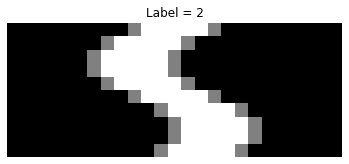

In [37]:
import pandas as pd
import numpy as np

df = pd.read_csv('training.csv', header=None)
matrix = df.to_numpy()

%matplotlib inline
import matplotlib.pyplot as plt

def show_road(img, caption='', subplot=None):
    if subplot==None:
        _,(subplot)=plt.subplots(1,1)
    imgr=img.reshape((10,25))
    subplot.axis('off')
    subplot.imshow(imgr, cmap='gray')
    plt.title(caption)

row = 15
show_road(matrix[row][1:], "Label = {}".format(matrix[row][0]))

In [38]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()

ClientError: An error occurred (IncompleteSignature) when calling the GetCallerIdentity operation: Credential must have exactly 5 slash-delimited elements, e.g. keyid/date/region/service/term, got 'uSgFPIZgxMpQ/oPm3xnTmZ5Wj6p4m7Zt3+WxAcoJ/20220125/us-east-1/sts/aws4_request'

In [ ]:
multiclass_estimator = sagemaker.LinearLearner(role=role,
                                               train_instance_count=1,
                                               train_instance_type='ml.m4.xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=3)

NameError: name 'role' is not defined

In [ ]:
mini_batch_size = 100
records = matrix[:,:-1].astype('float32')
labels = matrix[:,0].astype('float32')
train_records = multiclass_estimator.record_set(records, labels, channel='train')
multiclass_estimator.fit([train_records])


NameError: name 'multiclass_estimator' is not defined

In [ ]:
multiclass_predictor = multiclass_estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

In [ ]:
labels = ["left", "straight", "right"]

experiment = np.array([[0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0]]).astype('float32')
result = multiclass_predictor.predict(experiment)
predicted_label = int(result[0].label['predicted_label'].float32_tensor.values[0])
show_road(experiment, "Label = {}".format(labels[predicted_label]))

experiment = np.array([[0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0]]).astype('float32')
result = multiclass_predictor.predict(experiment)
predicted_label = int(result[0].label['predicted_label'].float32_tensor.values[0])
show_road(experiment, "Label = {}".format(labels[predicted_label]))



In [ ]:
# delete endpoint
multiclass_predictor.delete_endpoint()

In [ ]:
! pip install boto3 awscli sagemaker

  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [39]:
from sagemaker import image_uris # Use image_uris instead of get_image_uri
from sagemaker import TrainingInput  # Use instead of sagemaker.session.s3_input
region = boto3.Session().region_name
container = image_uris.retrieve('image-classification',region)
bucket= 'your-bucket-name'
prefix = 'output'
SageMakerRole='arn:aws:iam::xxxxxxxxxx:role/service-role/AmazonSageMaker-ExecutionRole-20191208T093742'

In [40]:
s3_output_location = 's3://{}/output'.format(bucket, prefix)
classifier = sagemaker.estimator.Estimator(container, 
                                         role=SageMakerRole,
                                         instance_count=1, 
                                         instance_type='ml.p2.xlarge',
                                         volume_size = 50,
                                         max_run = 360000,
                                         input_mode= 'File',
                                         output_path=s3_output_location)

classifier.set_hyperparameters(num_layers=152,
                             use_pretrained_model=0,
                             image_shape = "3,224,224",
                             num_classes=2,
                             mini_batch_size=32,
                             epochs=30,
                             learning_rate=0.01,
                             num_training_samples=963,
                             precision_dtype='float32')

In [41]:
train_data = TrainingInput(s3train, distribution='FullyReplicated', 
                        content_type='application/x-image', s3_data_type='S3Prefix')
validation_data = TrainingInput(s3validation, distribution='FullyReplicated', 
                             content_type='application/x-image', s3_data_type='S3Prefix')
train_data_lst = TrainingInput(s3train_lst, distribution='FullyReplicated', 
                        content_type='application/x-image', s3_data_type='S3Prefix')
validation_data_lst = TrainingInput(s3validation_lst, distribution='FullyReplicated', 
                             content_type='application/x-image', s3_data_type='S3Prefix')

data_channels = {'train': train_data, 'validation': validation_data, 
                 'train_lst': train_data_lst, 'validation_lst': validation_data_lst}

NameError: name 's3train' is not defined

In [42]:
classifier.fit(inputs=data_channels, logs=True)

NameError: name 'data_channels' is not defined